## Data Loading and quick glimpse

### Name: Jie Lu
### UNI: jl4961

In [1]:
#load packages for data preprocessing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
df = pd.read_excel("CBS ExecEd Dataset.xlsx")
df.shape

(504, 20)

In [3]:
#glimpse
df.head(5)

,User country,No. of reviews,No. of hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,No. of rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday


## Missing values 

In [4]:
pd.concat([df.apply(lambda x: sum(x.isnull())).rename("num_missing"),
          df.apply(lambda x: len(x.unique())).rename("num_unique")], axis=1)

,num_missing,num_unique
User country,0,48
No. of reviews,0,139
No. of hotel reviews,0,64
Helpful votes,0,109
Score,0,5
Period of stay,0,4
Traveler type,0,5
Pool,0,2
Gym,0,2
Tennis court,0,2


In [5]:
null_data = df[df.isnull().any(axis=1)]
null_data.shape

(96, 20)

In general the data is tidy, and the missing patterns through a quick look seems all locating in the same rows. To perform a baseline analysis, I may directly drop them all. But it's almost 20% of the total data, dropping them all should be problematic. Since the missing numbers are so consistent, my naive guess is that they may be all from one or some hotels. If time permitting, I will use methods such as fancyimput to simulate the missing terms for furthe analysis. Let's take a quick look of the missing patterns.

In [6]:
null_data.head(30)

,User country,No. of reviews,No. of hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,No. of rooms,User continent,Member years,Review month,Review weekday
240,Saudi Arabia,320,45,102,3,Dec-Feb,Business,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
241,USA,2,0,2,4,Dec-Feb,Business,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
242,USA,26,6,12,5,Dec-Feb,Families,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
243,USA,4,4,0,5,Dec-Feb,Couples,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
244,USA,9,9,6,2,Mar-May,Solo,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
245,USA,17,14,70,5,Mar-May,Friends,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
246,Canada,3,0,1,5,Mar-May,Couples,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
247,Canada,14,0,4,2,Mar-May,Families,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
248,USA,235,111,267,5,Mar-May,Friends,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
249,USA,59,9,21,5,Mar-May,Couples,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN


In [7]:
missing_hotels = null_data['Hotel name'].unique()
print(*missing_hotels, sep='\n')

The Cromwell
Hilton Grand Vacations on the Boulevard
Marriott's Grand Chateau
Wyndham Grand Desert


My guess/hypothesis is correct, all the missing patterns are from and only from the above four hotels.

For the missing features, the only term can be handled or manually handled is user continent. We can fill in it based on the given user country

In [8]:
# create a dictionary based on the existing country - continent relation
df_noNan = df.dropna()
geoDict = pd.Series(df_noNan['User continent'].values,index=df_noNan['User country']).to_dict()
len(geoDict)

43

In [9]:
# fill in the missing value by the geo Dict
for i in range(len(df['User continent'])):
    if df.iloc[i,0] in geoDict.keys():
        df.iloc[i,16] =geoDict[df['User country'][i]]

In [10]:
df[df['User continent'].isnull()]

,User country,No. of reviews,No. of hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,No. of rooms,User continent,Member years,Review month,Review weekday
240,Saudi Arabia,320,45,102,3,Dec-Feb,Business,YES,NO,NO,NO,YES,YES,The Cromwell,4,NaN,NaN,NaN,NaN,NaN
325,Denmark,240,76,115,5,Jun-Aug,Couples,YES,YES,NO,NO,YES,YES,Marriott's Grand Chateau,3,NaN,NaN,NaN,NaN,NaN
326,Taiwan,20,12,7,5,Jun-Aug,Families,YES,YES,NO,NO,YES,YES,Marriott's Grand Chateau,3,NaN,NaN,NaN,NaN,NaN
332,Kuwait,47,23,20,4,Sep-Nov,Couples,YES,YES,NO,NO,YES,YES,Marriott's Grand Chateau,3,NaN,NaN,NaN,NaN,NaN
404,Japan,23,9,23,3,Sep-Nov,Families,YES,YES,YES,NO,NO,YES,Wyndham Grand Desert,3,NaN,NaN,NaN,NaN,NaN


We can see this imputation method works pretty well, so we can fill in the rest 5 missing values manually based on basic geo knowledge.

In [11]:
df.iloc[240,16] = 'Asia'
df.iloc[325,16]= 'Europe'
df.iloc[326,16] = 'Asia'
df.iloc[332,16] = 'Asia'
df.iloc[404,16] = 'Asia'

In the next step, I treat all features independently, and edav their distribution to see what additional information may appear.

I plot the Score first, from applied machine learning perspective, this problem may most likely to be a multi classification problem, namely how those features would lead to different Scores. I plot the country alone because too many unique variables would be too crowded and less informational in a subplot. Same for the hotel name, and hotel name is definitely not a good choice as an independent variable.

## Basic EDAV 

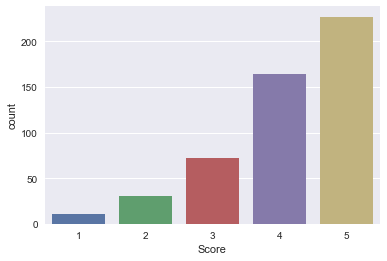

In [12]:
# Score distribution
sns.countplot(df['Score'])  

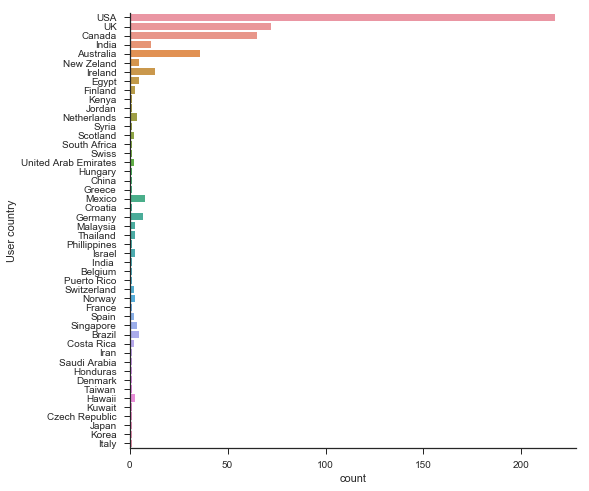

In [13]:
# country distribution
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(y = 'User country', data = df, ax=ax)   
sns.despine()

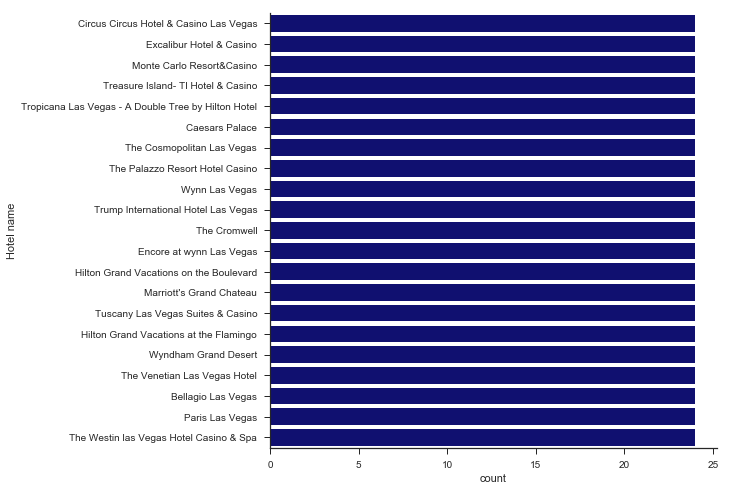

In [14]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(y = 'Hotel name', data = df, ax=ax, color='navy')   
sns.despine()

Well, it's evenly distributed. And it agrees with my guess that the 96 missing data rows consist of 4 hotels, 24 rows each.

In [60]:
# pick the categorical and discrete features
categorical_features = ['Period of stay',
                        'Traveler type',
                        'Pool',
                        'Gym',
                        'Tennis court',
                       'Spa',
                       'Casino',
                       'Free internet',
                       'Hotel stars',
                       'User continent',
                       'Review month',
                       'Review weekday']
discrete_features = ['No. of reviews', 
                     'No. of hotel reviews', 
                     'Helpful votes', 
                     'No. of rooms',
                     'Member years']
df_cat = df[categorical_features]
df_dis = df[discrete_features]

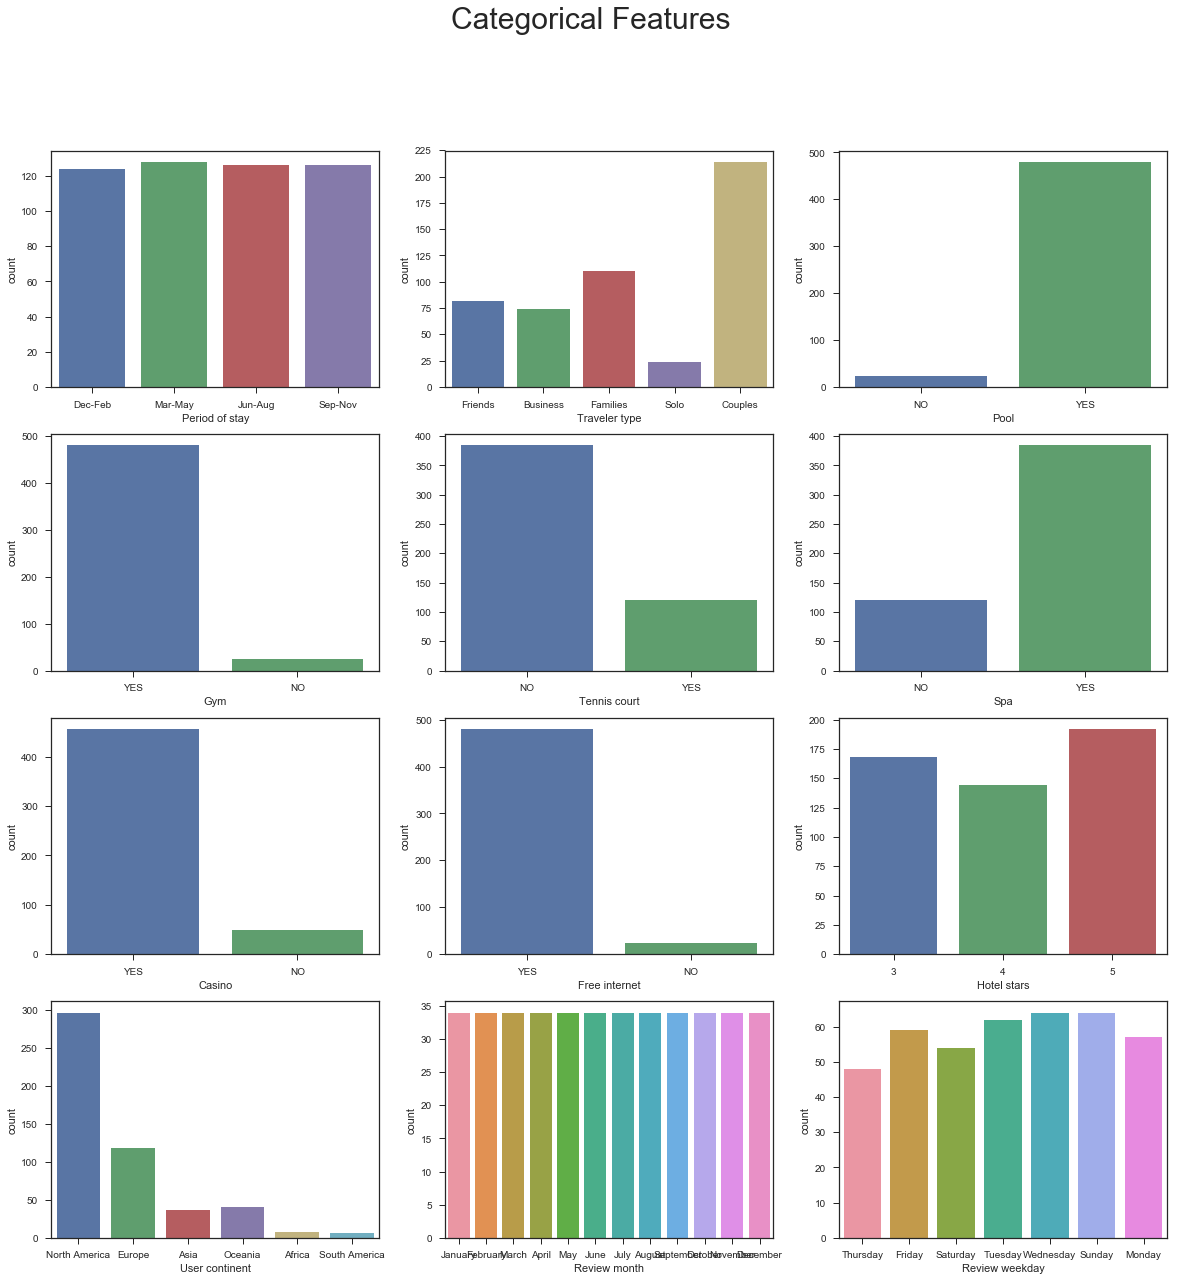

In [16]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
k=0
for i in range(4):
    for j in range(3):
        sns.countplot(df_cat.iloc[:,k],ax=axes[i,j])
        k+=1
        
plt.suptitle("Categorical Features", fontsize=30)

EDAV of the categorical variables is okay in genera. There seems to be no extreme outlier or erroneous value in these features. There may be some correlation among the binary variables which will be analyzed later.

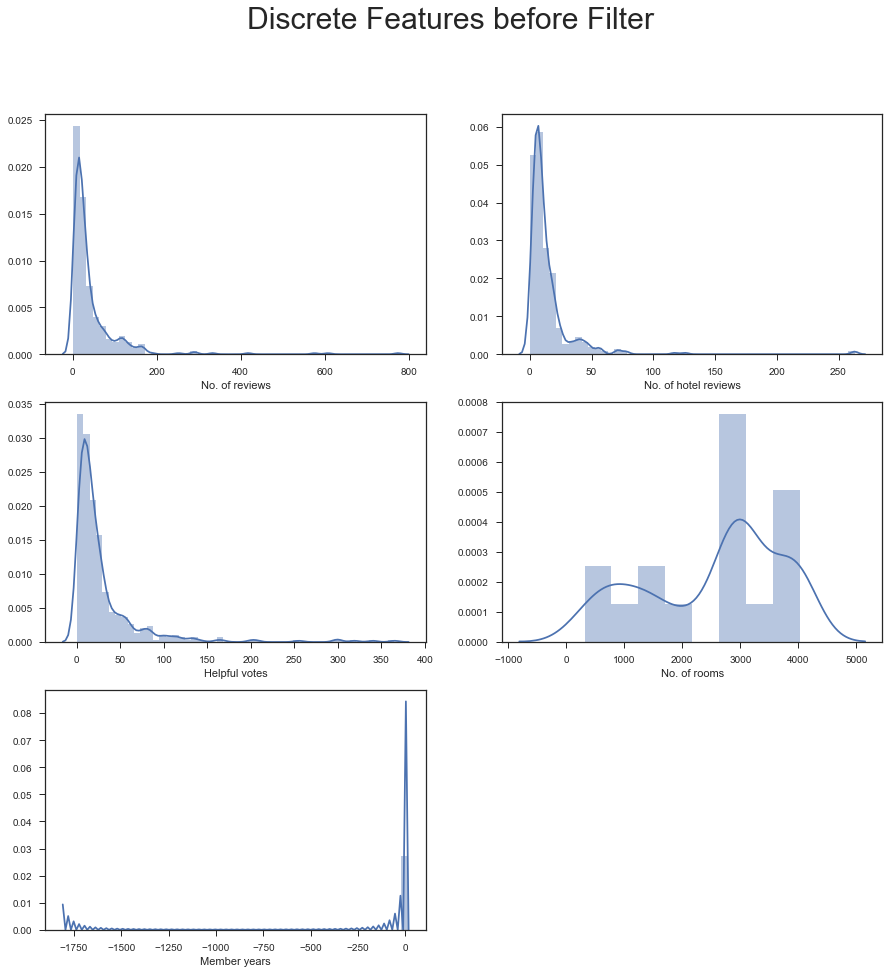

In [61]:
df_dis = df_dis.dropna()
fig, axes = plt.subplots(3,2,figsize=(15,15))
k=0
for i in range(3):
    for j in range(2):
        sns.distplot(df_dis.iloc[:,k],ax=axes[i, j])
        k+=1
        if k == 5:
            break
        
plt.suptitle("Discrete Features before Filter", fontsize=30)
fig.delaxes(axes[2][1])

And it maybe more informative when taking a look at the boxplot at the same time.

C:\Python36\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


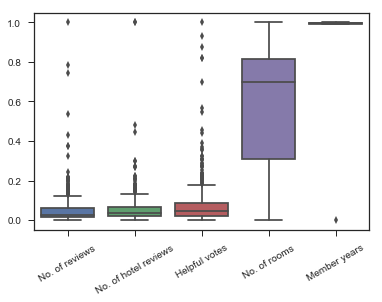

In [18]:
# To simplify and have better graph, manually minmaxscale those features
df_dis_scaled = df_dis - df_dis.min()
df_dis_scaled /= df_dis_scaled.max()
ax = sns.boxplot(df_dis_scaled)
rotate = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

These features are more problematic than the categorical ones. It's impossible for member years to be smaller than 0. It's possible for some users have large No. of reviews, but to analyze such a small data set, I will say No. of reviews > 400 can be treated as outliers. Similar for No. of hotel reviews, the value greater than 120 shouldn't be representative. The helpful votes, however is a tricky feature that I didn't dare to set cut off in a preliminary analysis, it may reveal important information and probably can be used as weights in further analysis.

In [43]:
# filter the data without touching the nan variables

df_2 = df[(df['Member years']>=0) | (df['Member years'].isnull())]
df_2 = df_2[df_2['No. of reviews'] <= 400]
df_2 = df_2[df_2['No. of hotel reviews'] <= 120]
df_2.shape

(495, 20)

Redraw the histogram for discrete features.

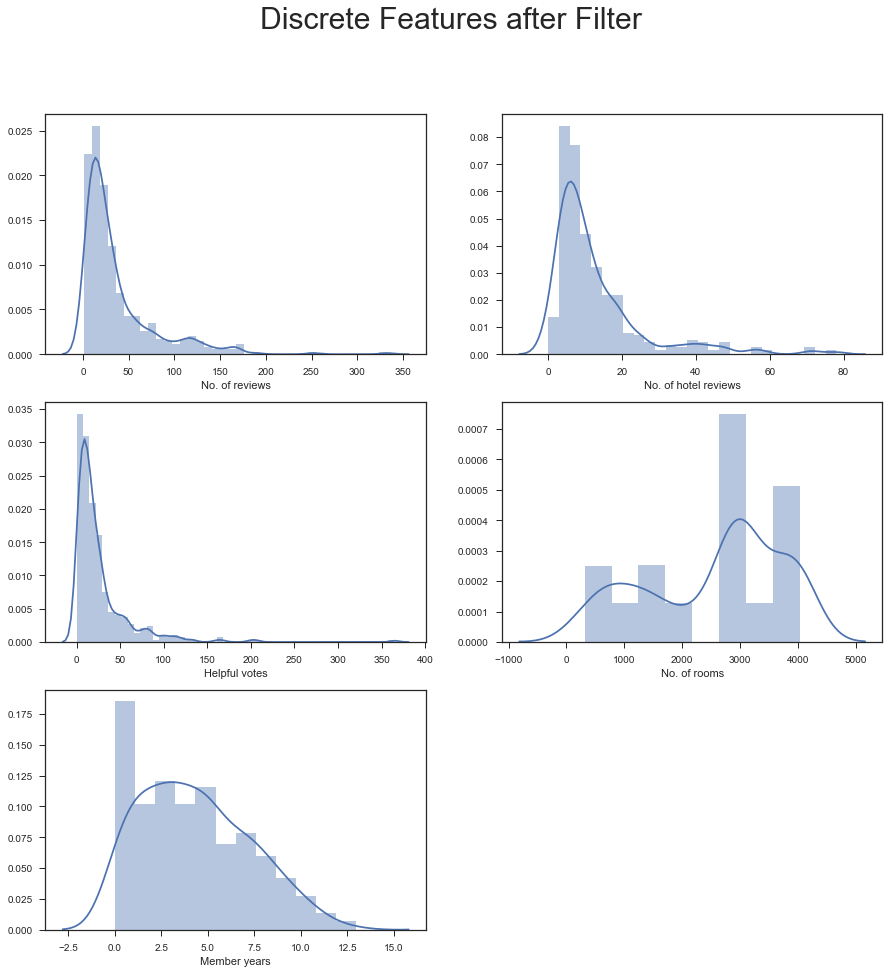

In [62]:
df_dis = df_2[discrete_features]
df_dis = df_dis.dropna()
fig, axes = plt.subplots(3,2,figsize=(15,15))
k=0
for i in range(3):
    for j in range(2):
        sns.distplot(df_dis.iloc[:,k],ax=axes[i, j])
        k+=1
        if k == 5:
            break
plt.suptitle("Discrete Features after Filter", fontsize=30)
fig.delaxes(axes[2][1])

## Some trivial case to avoid 

We should avoid the case such that "No. of reviews" is smaller than "No. of hotel reviews"

In [63]:
df_2 = df_2[df_2['No. of reviews']>=df_2['No. of hotel reviews']]
df_2.shape

(494, 20)

Fortunately, there does exist such one error term. Also there may be cases that user countries are incorrectly located in wrong user continent, but doing such a mapping is time consuming and usually we only need to pick one of them as independent variable to avoid collinearity, so I didn't do the mapping correction for geo features.

Also for the review month feature, there may be some review month inconsistent with the period of stay feature, but cases can be that the review is submitted after the stay, so I assume that review can be submitted any time after the stay, and leave those variables there.

In [64]:
# save the cleaned df
df_2.to_excel("CBS cleaned.xlsx")

## Dealing with binary variables 

Unlike R, python needs to do some mapping to better deal with binary variables

In [45]:
binary_features =  ['Pool','Gym','Tennis court','Spa','Casino','Free internet']

In [46]:
for i in binary_features:
    df_2[i] = df_2[i].map(dict(YES=1, NO=0))

## Getting the descriptive Stats for each feature  

The good thing for pandas describe() is that it can handle descriptive stats excluding the nan.

In [47]:
# Getting stats for binary variables
df_b = df_2[binary_features]
df_b.apply(lambda x: x.describe())

,Pool,Gym,Tennis court,Spa,Casino,Free internet
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.951417,0.951417,0.234818,0.761134,0.906883,0.957490
std,0.215213,0.215213,0.424315,0.426823,0.290891,0.201954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Getting stats for binary variables
categorical_features_nonbinary = ['Period of stay',
                                  'Traveler type',
                                  'Hotel name',
                                  'User country',
                                  'User continent',
                                  'Review month',
                                  'Review weekday']
df_c = df_2[categorical_features_nonbinary]
df_c.apply(lambda x: x.describe())

,Period of stay,Traveler type,Hotel name,User country,User continent,Review month,Review weekday
count,494,494,494,494,494,399,399
unique,4,5,21,48,6,12,7
top,Mar-May,Couples,The Venetian Las Vegas Hotel,USA,North America,April,Sunday
freq,127,209,24,210,289,34,64


In [49]:
# the name numerical features is just to simplify, in reality, hotel stars and Score are all categorical ordinal features
numerical_features = ['Score',
                      'No. of reviews', 
                     'No. of hotel reviews', 
                     'Helpful votes', 
                      'Hotel stars',
                     'No. of rooms',
                     'Member years']
df_n = df_2[numerical_features]
df_n.apply(lambda x: x.describe())

,Score,No. of reviews,No. of hotel reviews,Helpful votes,Hotel stars,No. of rooms,Member years
count,494.000000,494.000000,494.000000,494.000000,494.000000,399.000000,399.000000
mean,4.129555,41.925101,14.151822,28.180162,4.052632,2545.486216,4.333333
std,1.006781,51.083836,15.540147,38.479598,0.845741,1177.333438,2.924797
min,1.000000,1.000000,0.000000,0.000000,3.000000,315.000000,0.000000
25%,4.000000,12.000000,5.000000,8.000000,3.000000,1467.000000,2.000000
50%,4.000000,23.000000,9.000000,16.000000,4.000000,2916.000000,4.000000
75%,5.000000,50.000000,17.000000,32.000000,5.000000,3348.000000,6.000000
max,5.000000,372.000000,111.000000,365.000000,5.000000,4027.000000,13.000000


##  Covariance and correlation

Draw the covariance matrix of the numerical and binary variables. 

In [101]:
df_3 = df_2[['Score', 'No. of reviews', 'No. of hotel reviews', 'Helpful votes', 'Hotel stars',
             'Pool','Gym','Tennis court','Spa','Casino','Free internet']]

In [102]:
# scale the data
from sklearn.preprocessing import scale
df_3_scaled = scale(df_3)
cov = np.cov(df_3_scaled, rowvar=False)

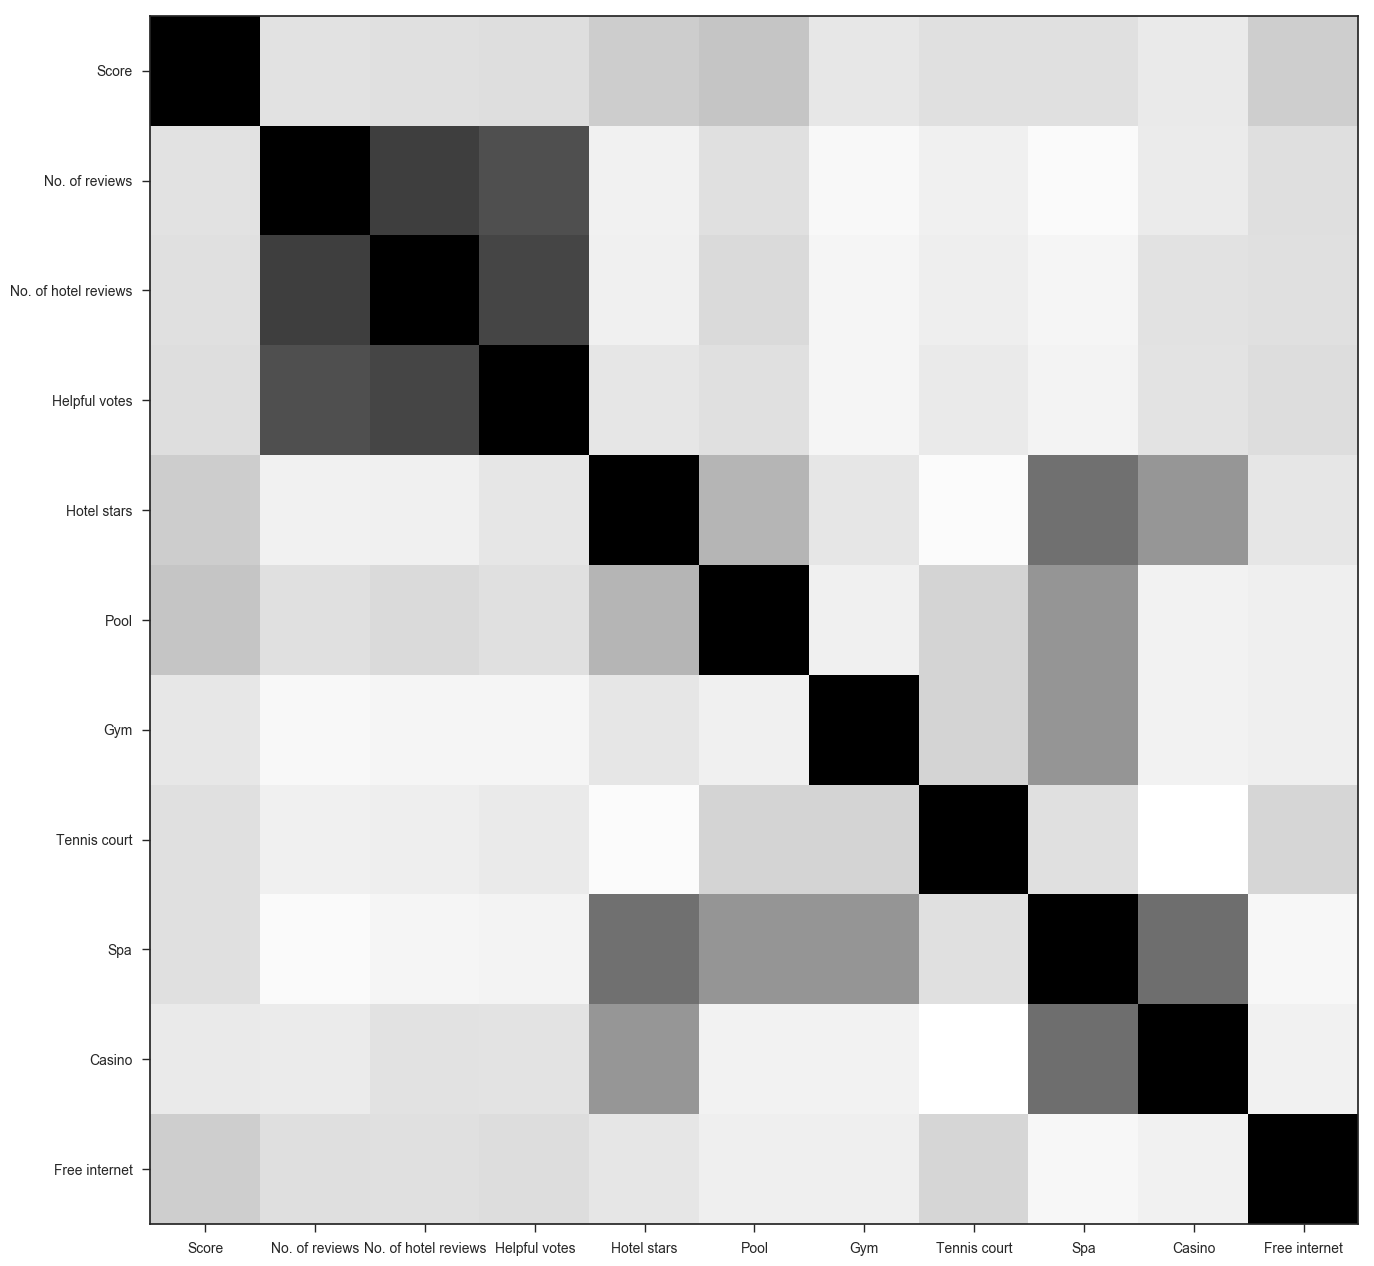

In [115]:
# show the covariance matrix
plt.figure(figsize=(16, 16), dpi=100)
cov_graph = plt.imshow(cov)
xtic = plt.xticks(range(df_3.shape[1]), list(df_3))
ytic = plt.yticks(range(df_3.shape[1]), list(df_3))

The darker the mosaic, the higher correlation between two features. Some features do have some correlation, so it's necessary to have a better view by reordering the covariance matrix feature space.

In [106]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

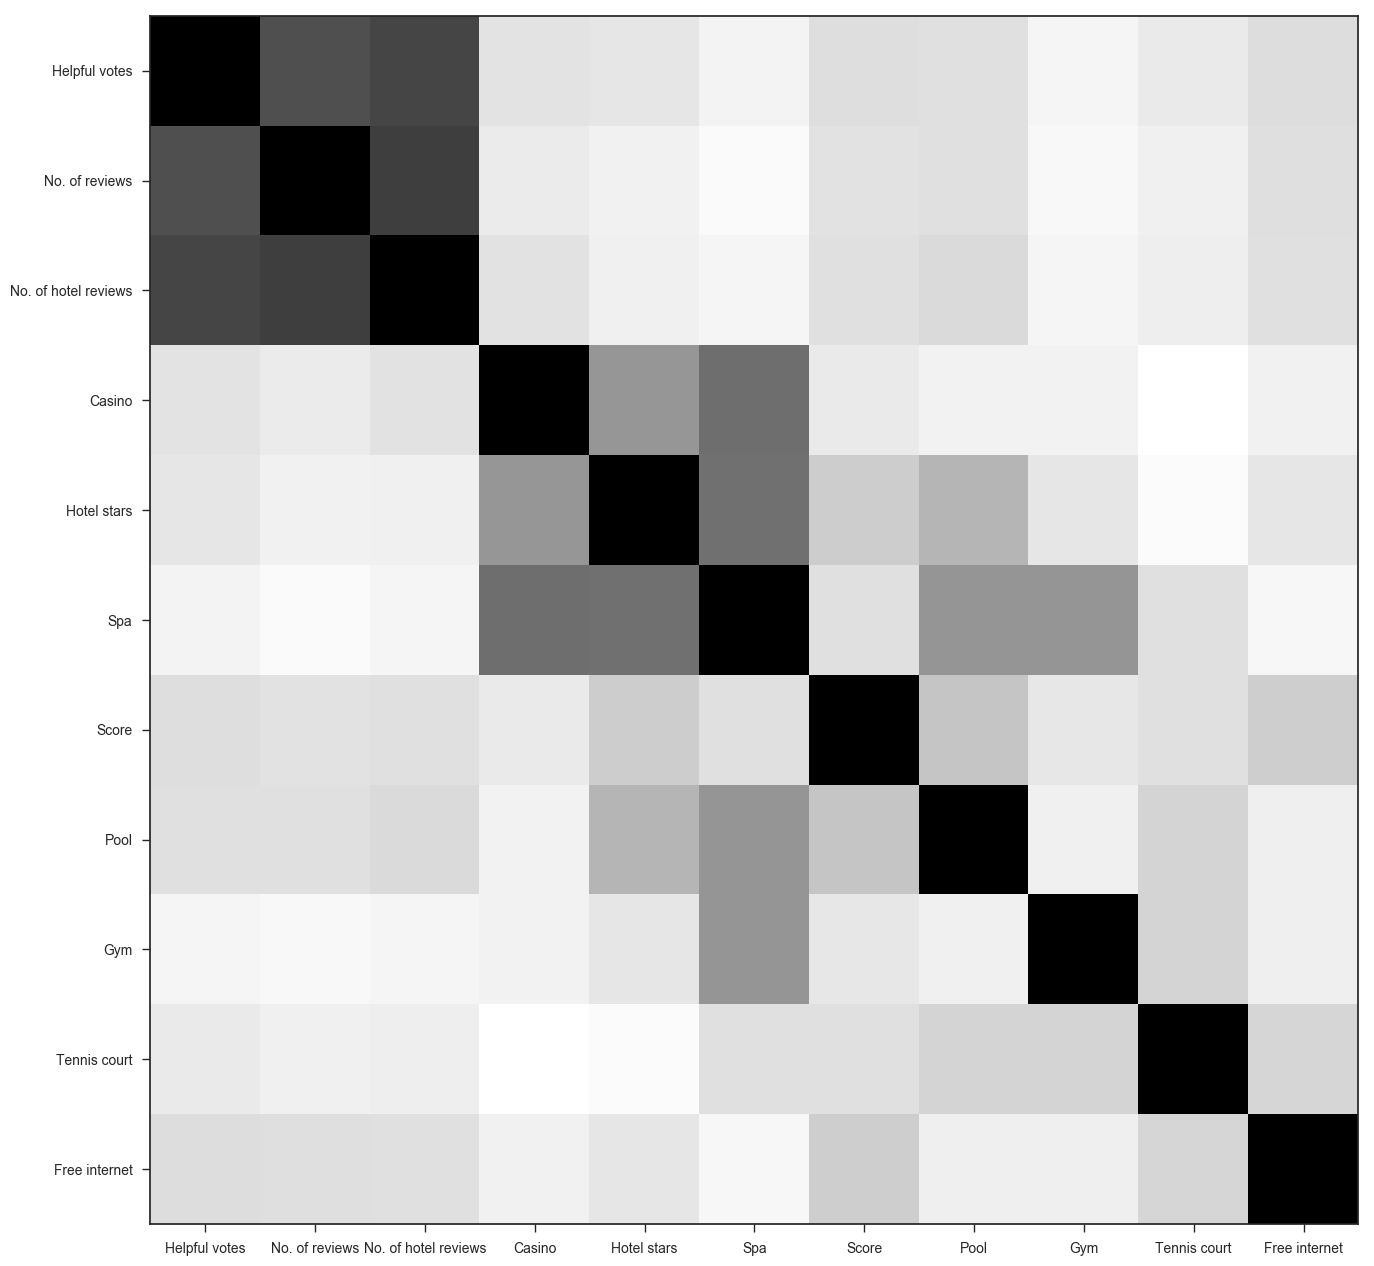

In [116]:
plt.figure(figsize=(16, 16), dpi=100)
cov_graph = plt.imshow(cov[order, :][:, order])
xtic = plt.xticks(range(df_3.shape[1]), np.array(list(df_3))[order])
ytic = plt.yticks(range(df_3.shape[1]), np.array(list(df_3))[order])

From the plot we can clearly observe that there are strong correlation among helpful votes, no. of reviews and no. of hotel reviews. Besides, there exist strong correlation among casino, hotel stars and spa. 

This result is not surprising, we may refer that customers enjoy commenting more also enjoy reviewing hotels more and more helpful suggestions/comments would come from this group of consumer. 

The hotel stars are ranking from 3 to 5, till this level, gym and pool may become a necessity and therefore not enough to separate a top hotel from many good hotels, while casino and spa can. But even for many top hotels, they are still not often equipped with tennis court, so i guess that's why tennis court doesn't play an important role here. Weirdly, poor and gym doesn't have a strong correlation, but spa has a relative strong correlation with both pool and gym.

Let's take a look at the correlation details.

In [148]:
# use correlation for better comparison
print( 'Corr between Helpful votes and No. of reviews: %.3f' % np.corrcoef(df_3['Helpful votes'], df_3['No. of reviews'])[0,1])
print( 'Corr between Helpful votes and No. of hotel reviews: %.3f' % np.corrcoef(df_3['Helpful votes'], df_3['No. of hotel reviews'])[0,1])
print( 'Corr between No. of reviews and No. of hotel reviews: %.3f' % np.corrcoef(df_3['No. of reviews'], df_3['No. of hotel reviews'])[0,1])
print( 'Corr between Casino and Hotel stars: %.3f' % np.corrcoef(df_3['Casino'], df_3['Hotel stars'])[0,1])
print( 'Corr between Casino and Spa: %.3f' % np.corrcoef(df_3['Casino'], df_3['Spa'])[0,1])
print( 'Corr between Spa and Hotel stars: %.3f' % np.corrcoef(df_3['Spa'], df_3['Hotel stars'])[0,1])
print( 'Corr between Spa and Gym: %.3f' % np.corrcoef(df_3['Spa'], df_3['Gym'])[0,1])
print( 'Corr between Spa and Pool: %.3f' % np.corrcoef(df_3['Spa'], df_3['Pool'])[0,1])

Corr between Helpful votes and No. of reviews: 0.707
Corr between Helpful votes and No. of hotel reviews: 0.740
Corr between No. of reviews and No. of hotel reviews: 0.763
Corr between Casino and Hotel stars: 0.399
Corr between Casino and Spa: 0.572
Corr between Spa and Hotel stars: 0.563
Corr between Spa and Gym: 0.403
Corr between Spa and Pool: 0.403


If time permitting, I could have done some A/B testing and groupby analysis for some categorical feature. Anyway, considering the time, let's jump directly to play the sample data with some machine learning models. Hope it could bring us more insight.

## Treat it as a classification problem: Score as label y and other features as X. Since it's a multi-class problem, random forests should behave pretty good

And it's very likely to get some taste of feature_importance from this approach

* This part is probably beyond the preliminary analysis scope; but since the task states it's open-end, I would likely to approach this problem from an applied machine learning perspective, and this size would not be time consuming, and we can get some insight almost for free.

Feature selection: I drop those columns with too much nan. Intuitively, review time shouldn't have something to do with the score. Quick check dropping 'Member years' and  'No. of rooms' would not be too problematic by the not nan variables.

Drop the country variable, because around 50 categories would not help much, and will become too sparse after onehotencode it.

Again, hotel name is tricky, cause we don't know whether the brand image would have some influence on customer or not, I chose not to eliminate this feature this time

Since this dataset is so small, it's not even necessary to preprune the trees and not necessary to do give a large n_estimator for forests.

In [154]:
df_4 = df_2.dropna()
print( 'Corr between Score and member years: %.3f' %np.corrcoef(df_4['Score'],df_4['Member years'])[0,1])
print( 'Corr between Score and No. of rooms: %.3f' %np.corrcoef(df_4['Score'],df_4['No. of rooms'])[0,1])

Corr between Score and member years: 0.078
Corr between Score and No. of rooms: -0.047


In [204]:
df_final = df_2.drop(['User country','Review month', 'Review weekday', 'Member years', 'No. of rooms'],axis=1)
np.array(list(df_final))

array(['No. of reviews', 'No. of hotel reviews', 'Helpful votes', 'Score',
       'Period of stay', 'Traveler type', 'Pool', 'Gym', 'Tennis court',
       'Spa', 'Casino', 'Free internet', 'Hotel name', 'Hotel stars',
       'User continent'], dtype='<U20')

In [205]:
# get dummies to deal with categorical features n df_final
category_columns = ['Hotel name','Period of stay', 'Traveler type', 'User continent']

df_final = pd.get_dummies(df_final, columns = category_columns)
df_final.shape

(494, 47)

In [255]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['Score'], axis=1)
y = df_final['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [252]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 128)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [253]:
print ('Accuracy:', rf.score(X_train,y_train))

Accuracy: 1.0


In [256]:
rf.score(X_test,y_test)

0.8933333333333333

The test score seems to be good, but actually appear to be too good for a dataset that has been manually adjust, there may be some overfitting. Let's take a look of the f1 score.

In [259]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred_1 = rf.predict(X_test)
print('Weighted precision: ', precision_score(y_pred_1, y_test, average = 'weighted'))
print('Overall precision: ', precision_score(y_pred_1, y_test, average = 'macro'))
print('Weighted recall: ', recall_score(y_pred_1, y_test, average = 'weighted'))
print('Overall recall: ', recall_score(y_pred_1, y_test, average = 'macro'))
print('Weighted f1: ', f1_score(y_pred_1, y_test, average = 'weighted'))
print('Overall f1: ', f1_score(y_pred_1, y_test, average = 'macro'))

Weighted precision:  0.9020524691358024
Overall precision:  0.8872685185185185
Weighted recall:  0.8933333333333333
Overall recall:  0.925287356321839
Weighted f1:  0.8943210559931871
Overall f1:  0.8974387907174792


Since the data is very balanced after cleaning, this f1 score makes sense and now check the model's behavior on test set. Cuurent version sklearn still doesn't support multi-class ROC AUC, but given such a high accuracy and f1, no more need to rank.

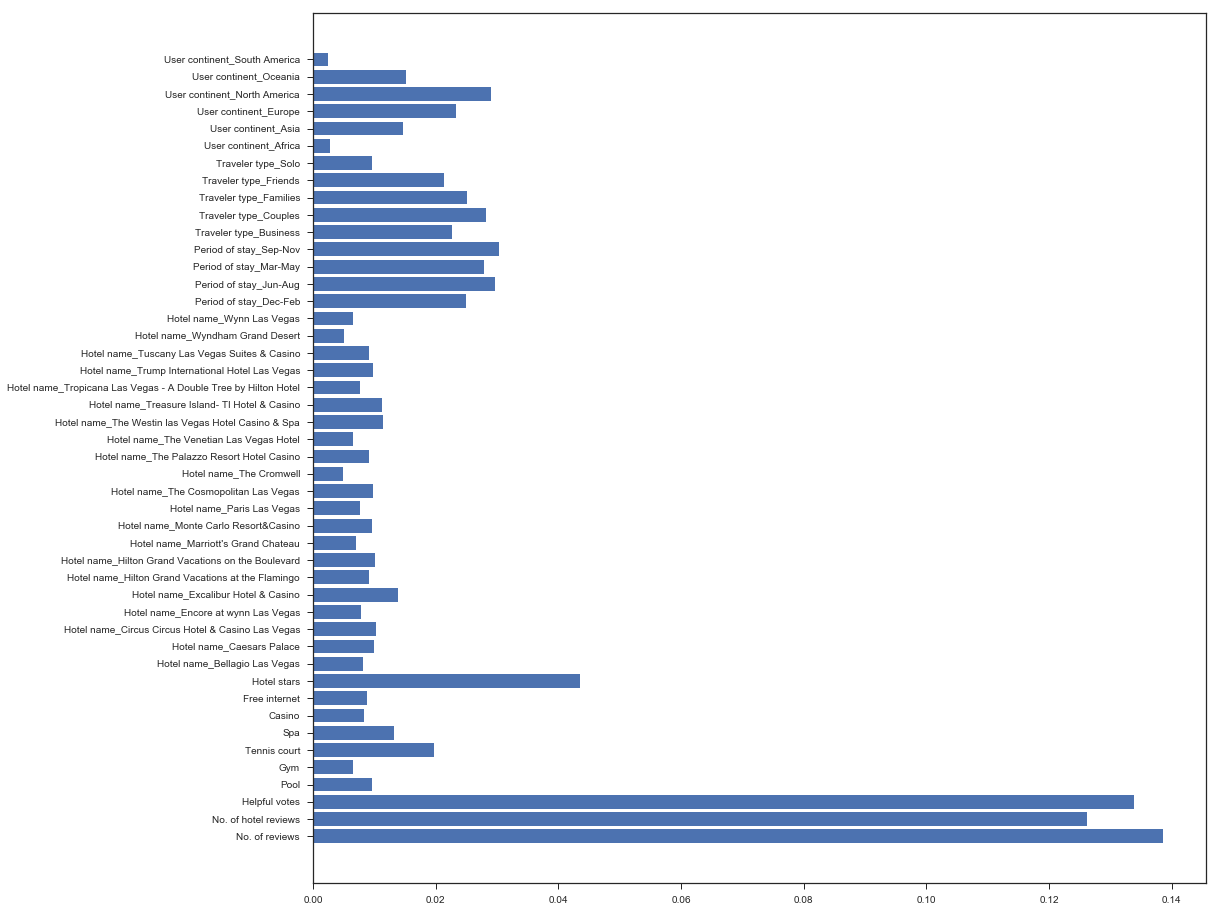

In [269]:
plt.figure(figsize=(16, 16))
importance = plt.barh(range(46), rf.feature_importances_)
ytic = plt.yticks(range(46), np.array(list(X_train)))

### Therefore, from an applied machine learning approach, the most important features to predict the score are shown above. The hotel stars, how active the customer on this travel website are the most important factors; travel_type, period of travel and the user countries also have some influence.